# SyriaTel Customer Churn Prediction 


* Student name: Nashon Okumu
* Student pace: Full time Remote
* Scheduled project review date/time: 07/06/2024
* Instructor name: Asha Deen
* Blog post URL:

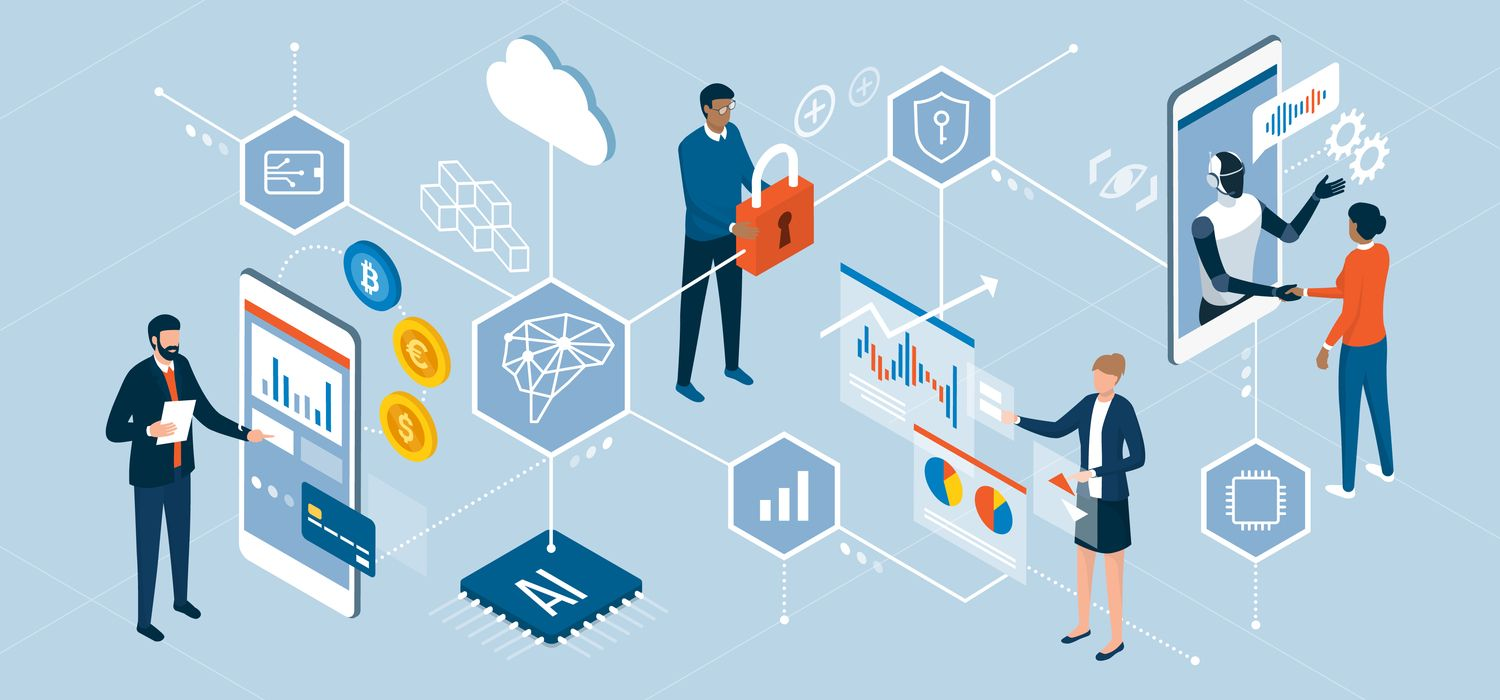

## 1. Business Understanding

### Problem Statement 

SyriaTel is a telecommunications company that is currently facing a very high churn rate as many customers tend to discontinue and leave their services and replacing them with their competitors. The company wants to develop a customer churn prediction model that would address this issue. SyriaTel aims to gain insights on contributing factors to the high churn rate in order to reduce it, increase customer retention and maximize the company's profits.

### Objectives

* To identify contributing factors of customer churn.
* To develop a model to predict customers at risk of churning.
* To recommend Proactive measures for customer retention.

### Metrics

* A robust customer churn prediction model with high accuracy and recall of 0.80.
* Key features contributing to customer churn.
* Actionable insights and recommendations to SyriaTe on churn reduction and customer retention.




## 2. Data Understanding

The dataset for this project is sourced from Kaggle (https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset). It has been downloaded directly from Kaggle's repository of datasets. Kaggle is a well-known platform for data science competitions, providing a wide array of datasets for educational and research purposes.

This dataset appears to be a single, consolidated dataset relevant to customer churn analysis. Each feature within the dataset is crucial for understanding different aspects of customer behavior and interactions with the service provider. The relevance of this dataset lies in its comprehensive nature, covering various dimensions such as service usage, financial charges, and customer support interactions, all of which are pivotal in predicting churn.

By analyzing these features, we can build predictive models to identify customers who are likely to churn, enabling the company to take proactive measures to retain them.

In [1]:
# Import Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data.csv')

In [3]:
# Preview the first and last rows of the DataFrame
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
# Display the shape of the dataframe
num_rows, num_columns = df.shape
print(f"The number of rows: {num_rows}")
print(f"The number of columns: {num_columns}")


The number of rows: 3333
The number of columns: 21


In [5]:
# Display general statistics for numeric columns
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
# Summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Display Categorical and Numerical Columns
categorical_columns = df.dtypes[df.dtypes == 'object'].index.tolist()
numerical_columns = df.dtypes[df.dtypes != 'object'].index.tolist()

# Print the results
print("Categorical columns:")
print(categorical_columns)

print("\nNumerical columns:")
print(numerical_columns)


Categorical columns:
['state', 'phone number', 'international plan', 'voice mail plan']

Numerical columns:
['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


#### Categorical Features:

`state`: The state where the customer resides.

`phone number`: The phone number of the customer.

`international plan`: Whether the customer has an international plan (Yes or No).

`voice mail plan`: Whether the customer has a voice mail plan (Yes or No).

#### Numeric Features:

`area code`: The area code associated with the customer's phone number.

`account length`: The number of days the customer has been an account holder.

`number vmail messages`: The number of voice mail messages received by the customer.

`total day minutes`: The total number of minutes the customer used during the day.

`total day calls`: The total number of calls made by the customer during the day.

`total day charge`: The total charges incurred by the customer for daytime usage.

`total eve minutes`: The total number of minutes the customer used during the evening.

`total eve calls`: The total number of calls made by the customer during the evening.

`total eve charge`: The total charges incurred by the customer for evening usage.

`total night minutes`: The total number of minutes the customer used during the night.

`total night calls`: The total number of calls made by the customer during the night.

`total night charge`: The total charges incurred by the customer for nighttime usage.

`total intl minutes`: The total number of international minutes used by the customer.

`total intl calls`: The total number of international calls made by the customer.

`total intl charge`: The total charges incurred by the customer for international usage.

`customer service calls`: The number of customer service calls made by the customer.

## 3. Data Preparation
In this section, we conduct necessary steps such as Data Cleaning, Data Exploration and Feature Engineering to prepare the data for Modeling.

### 3.1 Data Cleaning
Before Proceeding to the Analysis, there is need to first handle the missing values and duplicates in order to preserve integrity of the data

In [8]:
# Check for missing values
def check_missing_values(df):
    """
    A function to check for missing values in a DataFrame
    """
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        return "There are no missing values"
    else:
        missing_percent = (missing_values / len(df)) * 100
        missing_df = pd.DataFrame({
            'Number of Missing Values': missing_values,
            'Percentage of Missing Values': missing_percent
        })
        missing_df.sort_values(by='Number of Missing Values', ascending=False, inplace=True)
        return missing_df

In [9]:
check_missing_values(df)

'There are no missing values'

In [10]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

if duplicate_rows.empty:
    print("There are no duplicate rows.")
else:
    print("Duplicate rows:")
    print(duplicate_rows)

There are no duplicate rows.


Based on business understanding `area code` should be a categorical variable so we have to change it to object:

In [11]:
# Convert the data type of the "area code" column to object
df["area code"] = df["area code"].astype(object)

`phone number` is not directly relevant to our analysis, so we drop the column:

In [12]:
# Dropping the 'phone number' column
df = df.drop("phone number", axis=1)

### 3.2 Exploratory Data Analysis (EDA)

This section explores and uncovers the patterns in the dataset, and how the variables are related.

#### churn Distribution

In [13]:
df['churn'].unique().tolist()

[False, True]

`churn` has two classes for whether customers have churn or not, the classes are  `True` and `False`

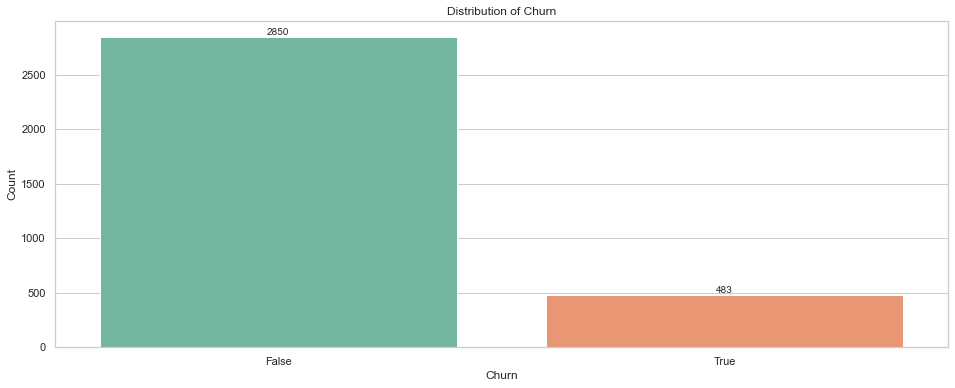

In [14]:
# Set up the plot
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")

# Create the bar chart
ax = sns.countplot(x="churn", data=df, palette="Set2")

# Add labels and title
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Distribution of Churn")

# Annotate the bars with actual count values
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()



Out of the 3333 customers, 483 have churned, which means they have terminated their contracts with the company. This distribution clealry indicates class imbalance which must be adressed before modeling as it can contribute to inaccurate predictions.

#### area code Distribution

In [15]:
df['area code'].unique().tolist()

[415, 408, 510]

`area code` has three classes: `415, 408, 510`. A pie chart can be used to visualize their distribution:

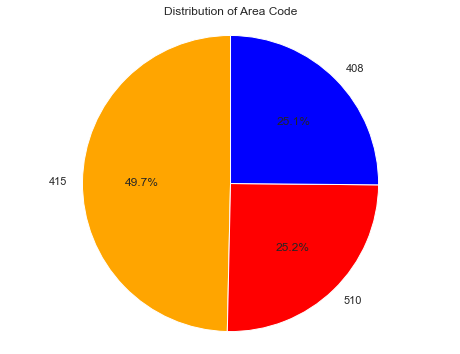

In [16]:
# Calculate the count of each area code
area_code_counts = df["area code"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = ["Orange", "Red", "Blue"]  # You can choose your own colors
plt.pie(area_code_counts, labels=area_code_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Area Code")

# Show the plot
plt.axis("equal") 
plt.show()

Almost half (49.2%) of customers come from `415`. About a fourth of customers come from `510` and another fourth from `408`.

#### Distribution of Numerical Features

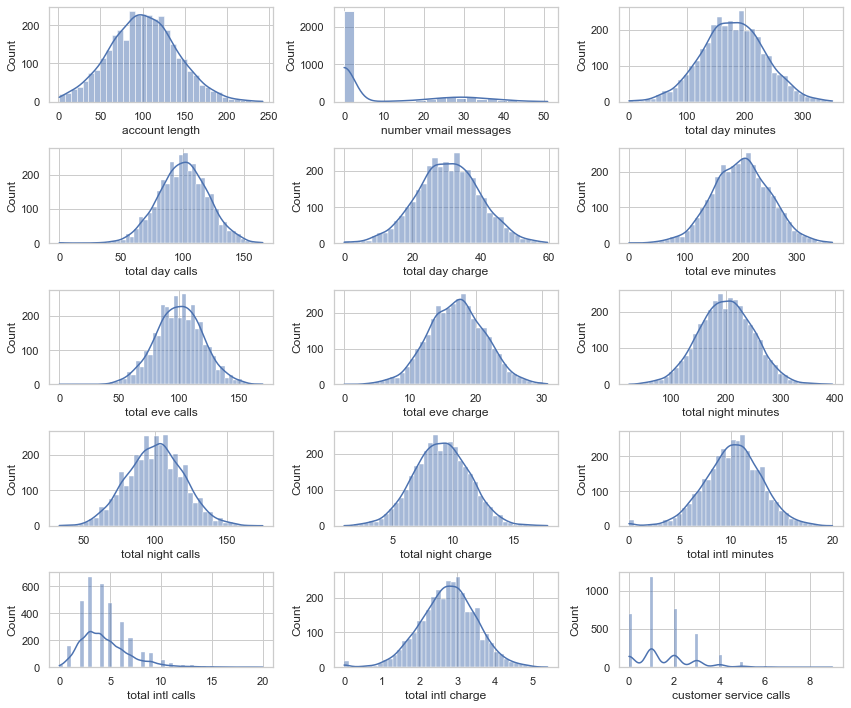

In [17]:
#checking for distribution of the numeric features
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Calculate the number of rows and columns for subplots
nrows = (len(numeric_features) - 1) // 3 + 1
ncols = min(3, len(numeric_features))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten axes if necessary
axes = axes.flatten() if nrows > 1 else [axes]

# Plot numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(df[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# Remove empty subplots
if len(numeric_features) < nrows * ncols:
    for i in range(len(numeric_features), nrows * ncols):
        fig.delaxes(axes[i])

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()

Clearly almost all features are normally distributed except `customer service calls` and `number of vmail messages` whose normal distribution are not perfect. `total intl calls` seem to be right skewed. However, few peaks in `customer service calls` could be an indication of few modes in the population.

#### Distribution of Categorical Features

In [18]:
st = df['state'].unique().tolist()
print(st)
print(len(st))

['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC', 'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND']
51


There are 51 unique states.

In [19]:
def plot_categorical_feature(df, categorical_feature):
    """
    Plots a bar chart for a specified categorical feature in the DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        categorical_feature (str): The name of the categorical feature to plot.

    Returns:
        None
    """
    # Calculate value counts and sort in descending order
    value_counts = df[categorical_feature].value_counts().sort_values(ascending=False)

    # Create a gradient color palette (reversed order)
    n_categories = len(value_counts)
    color_palette = sns.color_palette("Blues_r", n_categories)

    # Create the bar chart
    plt.figure(figsize=(16, 6))
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=color_palette)
    plt.title(f"Distribution of {categorical_feature}")
    plt.xlabel(categorical_feature)
    plt.ylabel("Count")
    plt.xticks(rotation=90) 

    # Annotate the bars with actual count values
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()

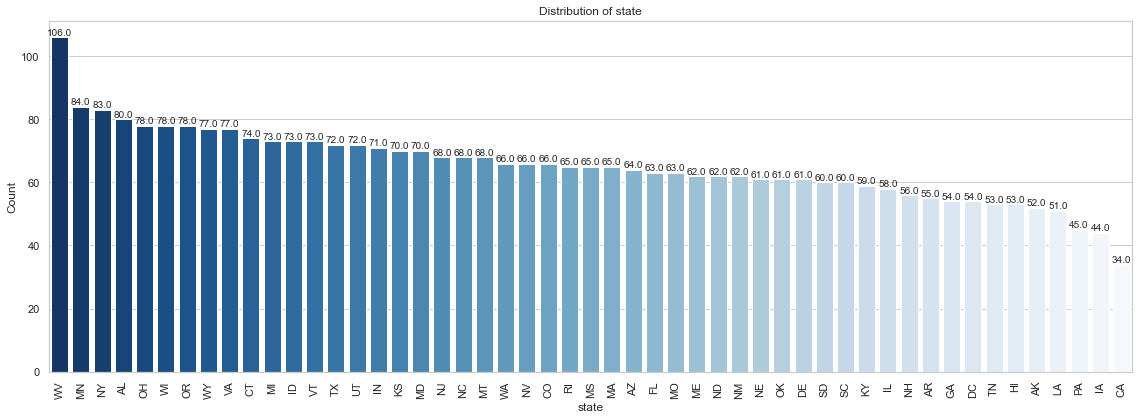

In [20]:
plot_categorical_feature(df, 'state' )

This distibution shows that most customers come from West Virginia `WV`, Minnesota `MN`, New York `NY`, and Ohio `OH`.

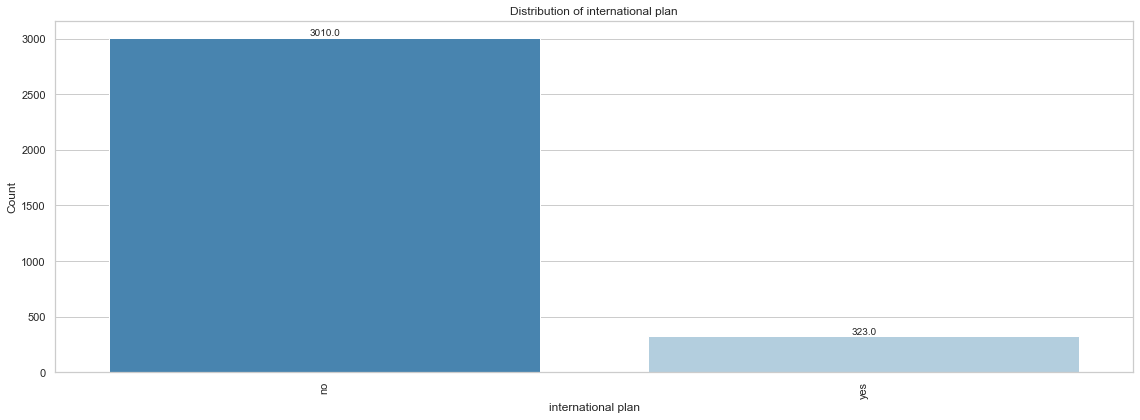

In [21]:
plot_categorical_feature(df, 'international plan' )

Out of the 3333 customers, only 323 have international plan.

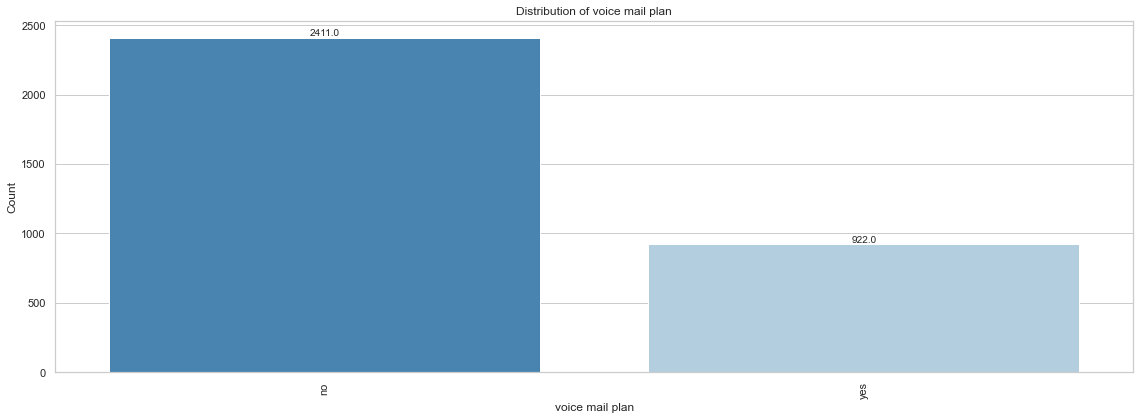

In [22]:
plot_categorical_feature(df, 'voice mail plan' )

Out of the 3333 customers, only 922 have voice mail plan.

#### Distribution of Categorical Features by `churn` rate 

In [23]:
def plot_categorical_by_churn(data, feature, title):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(16, 6))
    churn_counts = data.groupby(feature)["churn"].sum().sort_values(ascending=False)
    categories = churn_counts.index.tolist()
    sns.countplot(x=feature, hue="churn", data=data, order=categories)
    plt.xticks(rotation=90)
    plt.title(title, fontsize = 16)
    plt.legend(loc="upper right")
    plt.show()

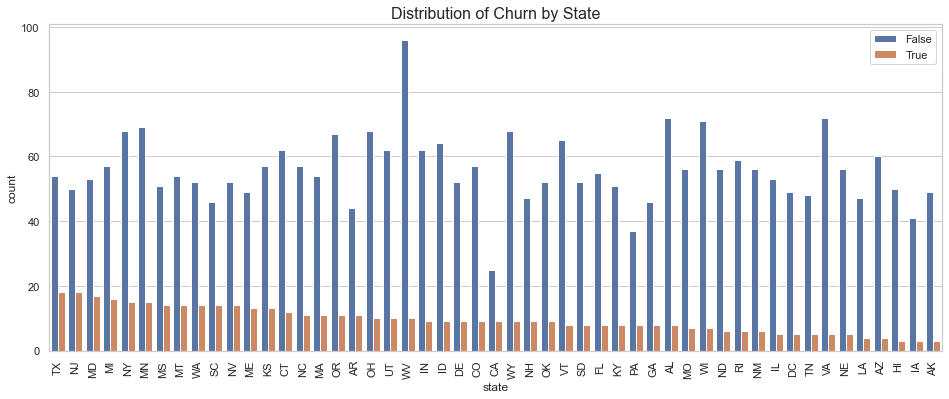

In [24]:
plot_categorical_by_churn(df, 'state', 'Distribution of Churn by State')

Majority of customers who churn come from Texas `TX`, New Jersey `NJ` , Maryland `MD`, Miami `MI` and New York `NY`.

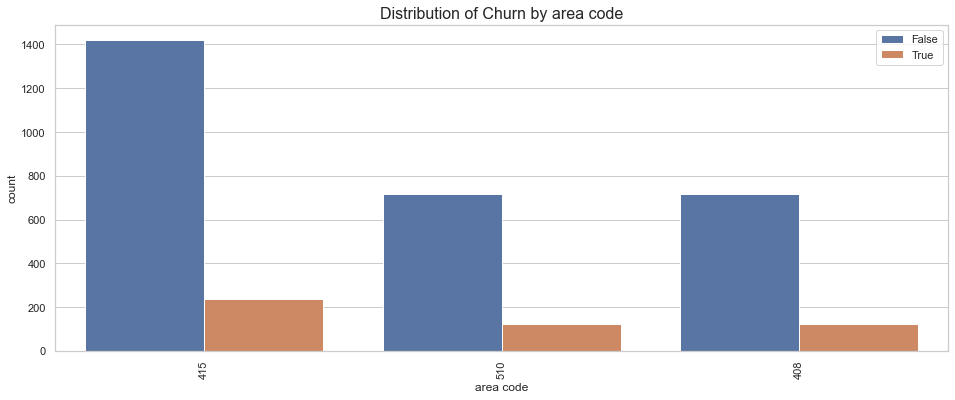

In [25]:
plot_categorical_by_churn(df, 'area code', 'Distribution of Churn by area code')

Most customers who churned come from area code `415` 

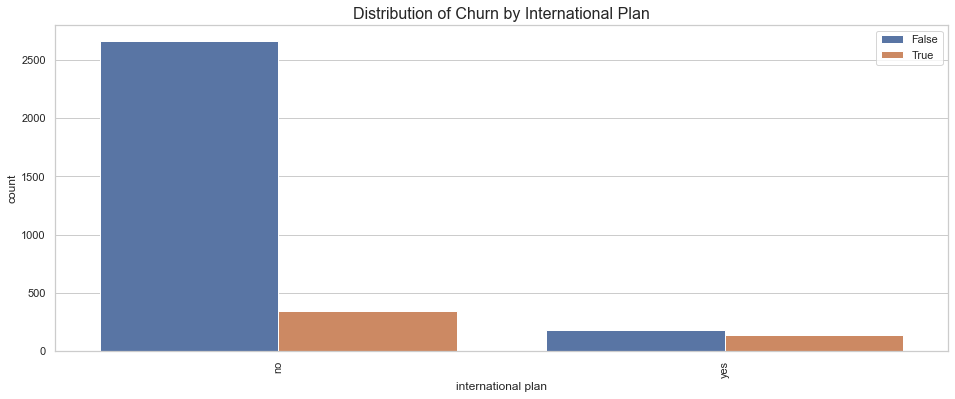

In [26]:
plot_categorical_by_churn(df, 'international plan', 'Distribution of Churn by International Plan')

Majority of customers who churned did not subscribe to an international plan while those who retained their accounts had very few with international plans but quite higher than those who churned.

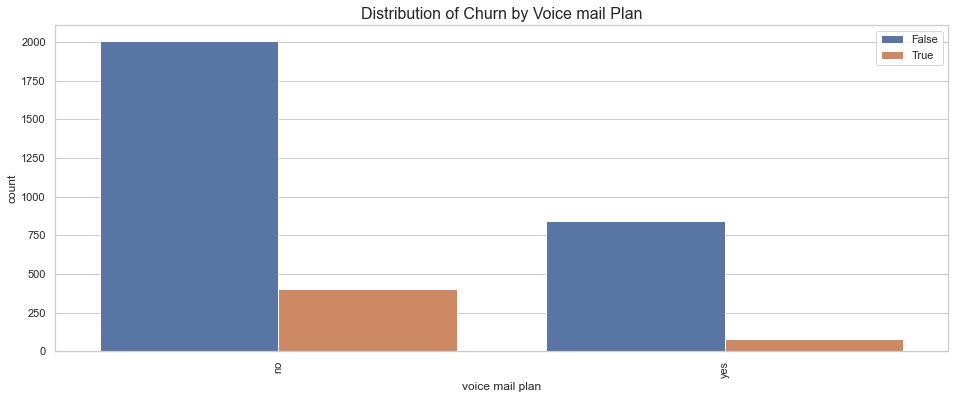

In [27]:
plot_categorical_by_churn(df, 'voice mail plan', 'Distribution of Churn by Voice mail Plan')

Majority of customers who churned did not subscribe to a voice mail plan while those who retained their accounts had very few with voice mail plans but quite higher than those who churned.

#### Distribution of Churn by day charges

In [28]:

def plot_churn_kde(df, x_column, charge_type):
    """
    A function to plot features based on churn rate.

    Args:
        data (pd.DataFrame): The input DataFrame.
        x_column (str): The column to plot (e.g., "total day minutes").
        charge_type (str): A description of the charge type (e.g., "Day", "Night", etc.).

    Returns:
        None
    """
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=x_column, hue='churn', fill=True, palette=["#0072B2", "#009E73"])
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()


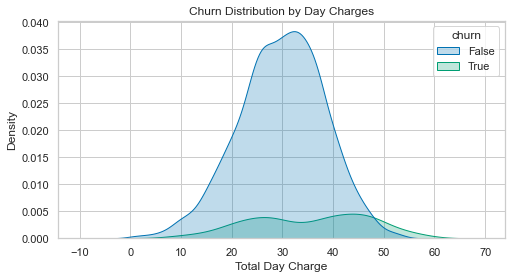

In [29]:
plot_churn_kde(df, 'total day charge', 'Day')

Customers who terminated their accounts incurred high charges during the day implying that unhappy customers find the day charges to be too expensive. 

#### Distribution Churn by evening charges

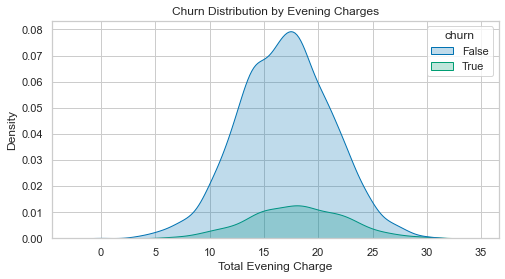

In [30]:
plot_churn_kde(df, 'total eve charge', 'Evening')

This patterns is also similar to day charges hence those who terminated their accounts tend to incur higher charges in the evening.

#### Distribution Churn by night charges

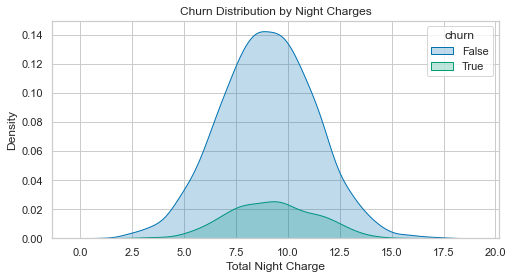

In [31]:
plot_churn_kde(df, 'total night charge', 'Night')

Customers who have terminated their account incur high charges at night compare to those who have retained their account

#### Distribution Churn by International Charges

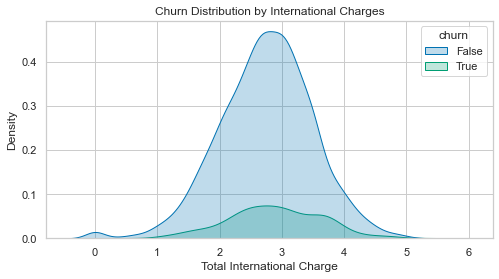

In [32]:
plot_churn_kde(df, 'total intl charge', 'International')

Customers with internatinal charges are less likely to churn compared to those with no international charges

### 3.3 Handling Outliers

In [33]:
#check outliers
def visualize_outliers(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 2
    n_rows = int(np.ceil(len(numerical_cols) / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(f'Box plot of {col}')
        axes[i].set_ylabel('Value')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


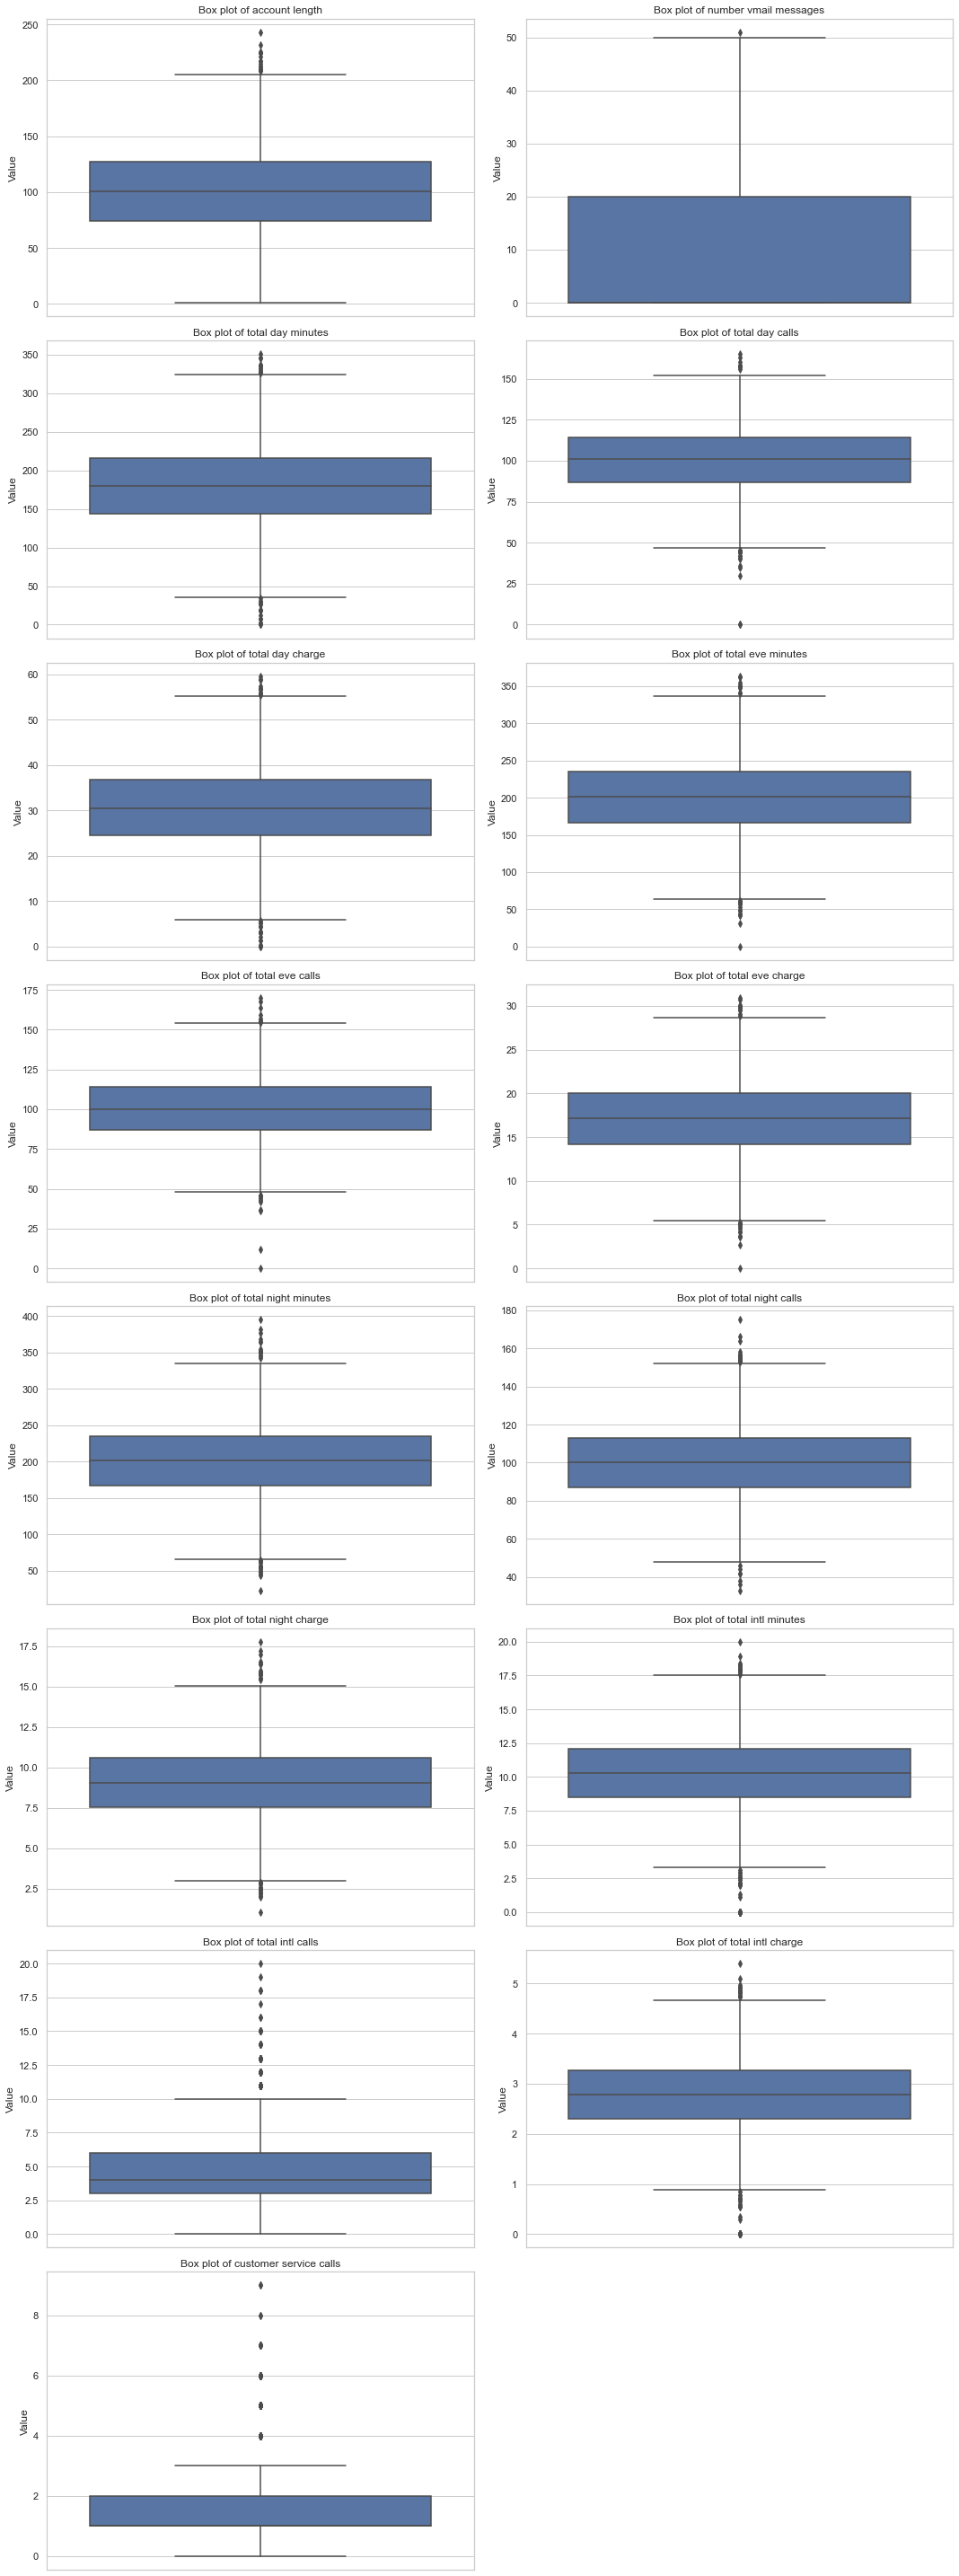

In [34]:
visualize_outliers(df)


Clearly most features have outliers in them. They can introduce noise in the data. We will handle by removing those with more than three standard deviations to improve the ability of our model to make accurate predictions:

In [35]:
def remove_outliers(df, z_threshold=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_threshold) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
remove_outliers(df)
print(df.shape)

(3169, 20)


Most outliers have been removed and the new dataset has 3169  rows.

### 3.4 Correlation Analysis

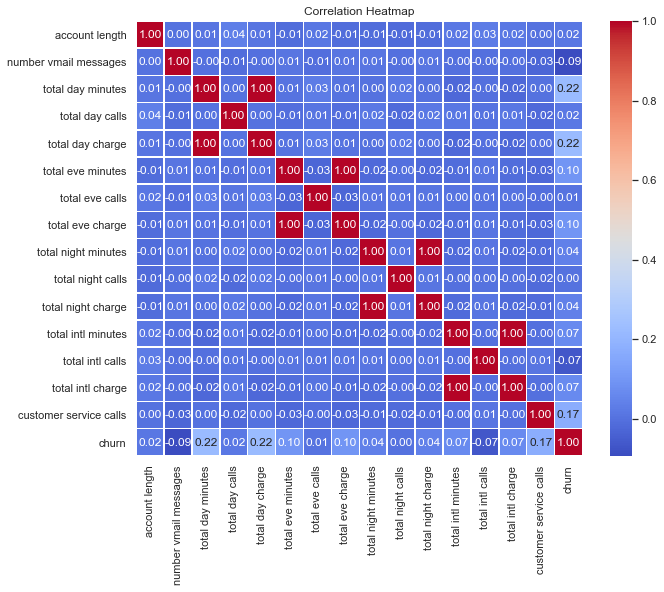

In [36]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Clearly, most features are not correlate as the correlation value is too low or a negative. However, `Total day charge` and `total day minutes`, `Total eve charge` and `total eve minutes` , `Total night charge` and `total night minutes`, `Total int charge` and `total int minutes` share a strong positive correlation which indicates a perfect correlation between the selected pair of features.

#### Handling Multicollinearity

It is important to handle multicollinearity between the selected pairs of feature as it can cause overfitting:

In [37]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

# Drop the features
df = df.drop(to_drop, axis=1)

Now we have dropped the features with very high correlation value of more than 0.9.

### 3.6 Feature Engineering
We now engineering features using label encoding, one hot encoding and scaling.

#### Encoding

Now we first perform label encoding by applying binary to columns with 'yes' or 'no':

In [38]:
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])

Let us convert categorical variables to get a set of binary features. We creat new feature for each categoy and assign to binary using one Hot Encoding:

In [39]:
df = pd.get_dummies(df,columns = ['state', 'area code','international plan','voice mail plan'])
df.head()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,25,110,45.07,99,16.78,91,11.01,3,2.70,...,0,0,0,0,1,0,1,0,0,1
1,107,26,123,27.47,103,16.62,103,11.45,3,3.70,...,0,0,0,0,1,0,1,0,0,1
2,137,0,114,41.38,110,10.30,104,7.32,5,3.29,...,0,0,0,0,1,0,1,0,1,0
3,84,0,71,50.90,88,5.26,89,8.86,7,1.78,...,0,0,0,1,0,0,0,1,1,0
4,75,0,113,28.34,122,12.61,121,8.41,3,2.73,...,0,0,0,0,1,0,0,1,1,0


#### Scaling

It is important to conduct scaling to reduce the impact of outliers and standardize the variables. We will use Min-Max Normalization:

In [40]:
scaler = MinMaxScaler()

def scaling(columns):
    return scaler.fit_transform(df[columns].values.reshape(-1,1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)
df.head()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,0.587963,0.510204,0.576271,0.773956,0.487179,0.490082,0.422414,0.643644,0.2,0.487585,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.490741,0.530612,0.686441,0.450248,0.521368,0.483858,0.525862,0.675974,0.2,0.713318,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.629630,0.000000,0.610169,0.706088,0.581197,0.238040,0.534483,0.372520,0.4,0.620767,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.384259,0.000000,0.245763,0.881184,0.393162,0.042007,0.405172,0.485672,0.6,0.279910,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.342593,0.000000,0.601695,0.466250,0.683761,0.327888,0.681034,0.452608,0.2,0.494357,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## 4. Modeling


### 4.1 Train-Test Split


Now we split the data to 80% train and 20% test sets:

In [41]:
X = df.drop("churn", axis=1)
y = df["churn"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=123)

#### SMOTE for Balancing `churn` Classes

We now use SMOTE Algorithm  to balance class distribution by randomly increasing minority class examples by replicating them:

In [42]:
smote = SMOTENC(categorical_features = [1,2],random_state = 123)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train,y_train)

### 4.1 Logistic Regression 

In [43]:
# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the model on the resampled training data
logreg.fit(resampled_X_train, resampled_y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

In [44]:
def plot_conf_matrix(y_true, y_pred, class_labels, title='Confusion Matrix', cmap='Oranges'):
    """
    Plots a stylized confusion matrix.
    
    Parameters:
    - y_true: array-like, ground truth target values.
    - y_pred: array-like, predicted target values.
    - class_labels: list of strings, class names.
    - title: string, title of the plot.
    - cmap: string, color map to use for the plot.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Set up the matplotlib figure
    plt.figure(figsize=(10, 7))
    
    # Plot the heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, 
                xticklabels=class_labels, yticklabels=class_labels, 
                cbar=False, linewidths=0.5, linecolor='black', square=True)
    
    # Add labels and title
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    
    # Improve layout and display the plot
    plt.tight_layout()
    plt.show()

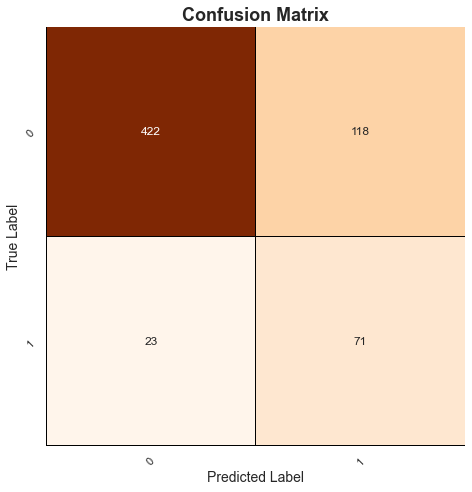

In [45]:
plot_conf_matrix(y_test, y_pred, [0,1])

In [46]:
def print_classification_report(y_true, y_pred):
    """
    Prints a classification report.

    Parameters:
    - y_true: array-like, ground truth target values.
    - y_pred: array-like, predicted target values.
    """
    report = classification_report(y_true, y_pred)
    print(report)

In [47]:
print_classification_report(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86       540
         1.0       0.38      0.76      0.50        94

    accuracy                           0.78       634
   macro avg       0.66      0.77      0.68       634
weighted avg       0.86      0.78      0.80       634



In [48]:
def plot_top_feature_importances(model, feature_names, title='Top 10 Feature Importances', color='orangered'):
    """
    Plots the top 10 feature importances from a model.
    
    Parameters:
    - model: The trained model with either `feature_importances_` or `coef_` attribute.
    - feature_names: List of feature names.
    - title: String, title of the plot.
    - color: String, color of the bars.
    """
    # Check if the model has the required attributes
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0]) if model.coef_.ndim == 1 else np.mean(np.abs(model.coef_), axis=0)
    else:
        raise ValueError("The model does not have `feature_importances_` or `coef_` attributes.")
    
    # Create a DataFrame for feature importances
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    
    # Sort by importance and select the top 10 features
    importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)
    
    # Plot the top 10 feature importances
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df, color=color)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.show()

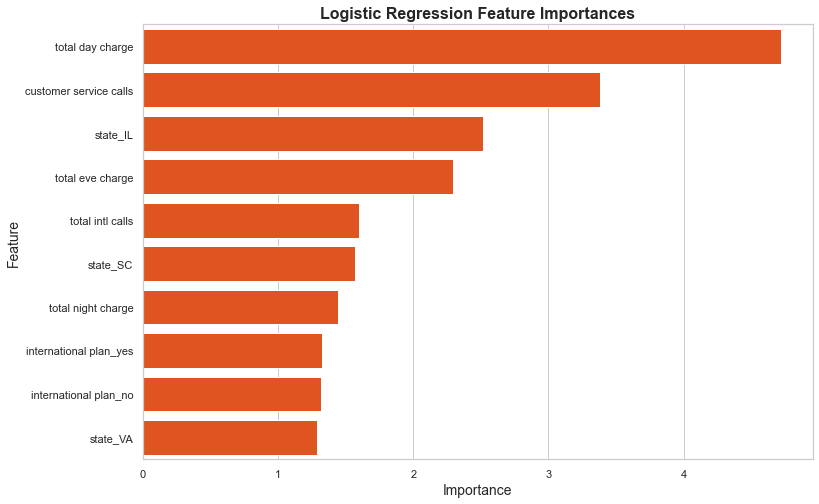

In [49]:
plot_top_feature_importances(logreg, feature_names=X_train.columns, title='Logistic Regression Feature Importances')

### 4.2 Decision Tree

In [50]:
dt_clf = DecisionTreeClassifier(random_state=123)
dt_clf.fit(resampled_X_train,resampled_y_train)

DecisionTreeClassifier(random_state=123)

In [51]:
y_pred_dt = dt_clf.predict(X_test)

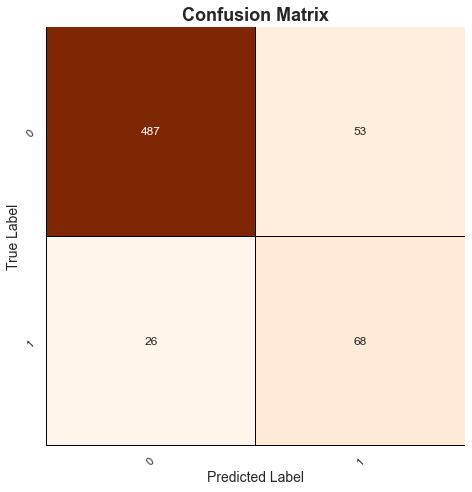

In [52]:
plot_conf_matrix(y_test, y_pred_dt, [0,1])

In [53]:
print_classification_report(y_test, y_pred_dt)

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92       540
         1.0       0.56      0.72      0.63        94

    accuracy                           0.88       634
   macro avg       0.76      0.81      0.78       634
weighted avg       0.89      0.88      0.88       634



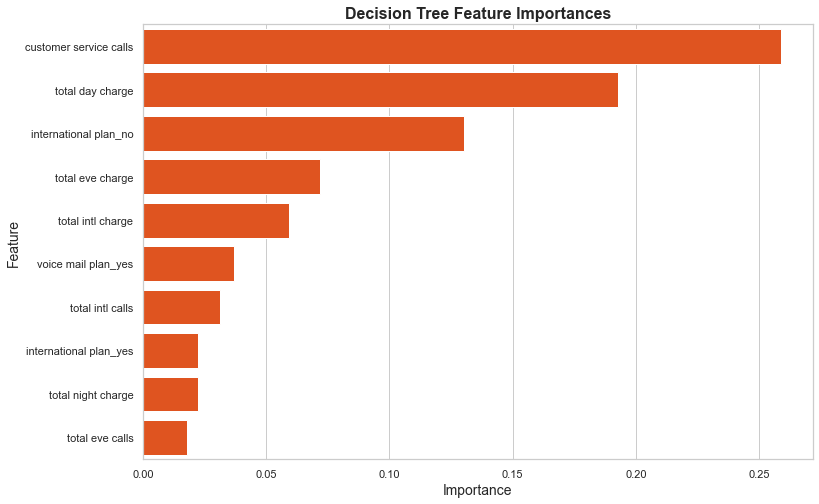

In [54]:
plot_top_feature_importances(dt_clf, feature_names=X_train.columns, title='Decision Tree Feature Importances')

### 4.3 Random Forest

In [55]:
rf = RandomForestClassifier(random_state=123)
rf.fit(resampled_X_train,resampled_y_train)

RandomForestClassifier(random_state=123)

In [56]:
y_pred_rf = rf.predict(X_test)

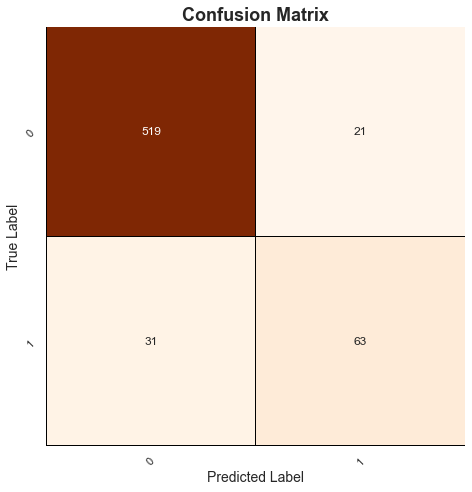

In [57]:
plot_conf_matrix(y_test, y_pred_rf, [0,1])

In [58]:
print_classification_report(y_test, y_pred_rf)

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       540
         1.0       0.75      0.67      0.71        94

    accuracy                           0.92       634
   macro avg       0.85      0.82      0.83       634
weighted avg       0.91      0.92      0.92       634



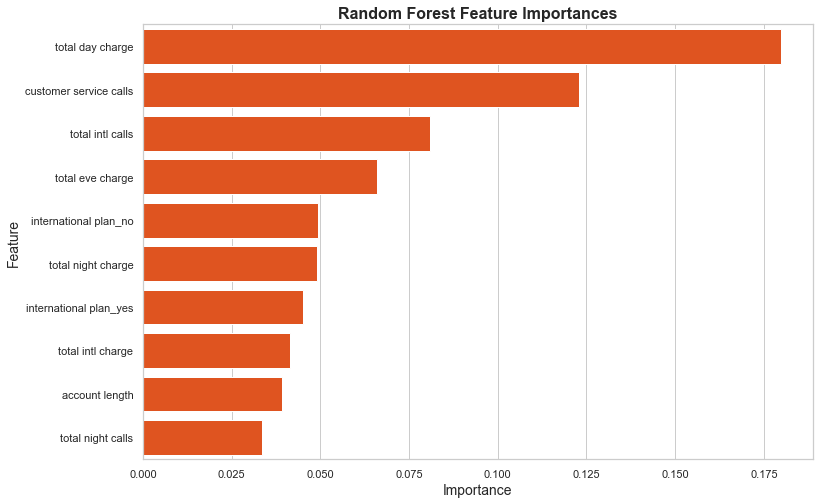

In [67]:
plot_top_feature_importances(rf, feature_names=X_train.columns, title='Random Forest Feature Importances')

### 4.4 XG Boost

In [60]:
xg = XGBClassifier(random_state=123)
xg.fit(resampled_X_train,resampled_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [61]:
y_pred_xg = xg.predict(X_test)

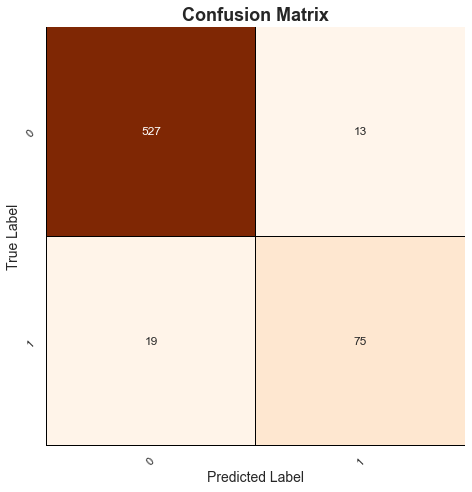

In [62]:
plot_conf_matrix(y_test, y_pred_xg, [0,1])

In [63]:
print_classification_report(y_test, y_pred_xg)

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       540
         1.0       0.85      0.80      0.82        94

    accuracy                           0.95       634
   macro avg       0.91      0.89      0.90       634
weighted avg       0.95      0.95      0.95       634



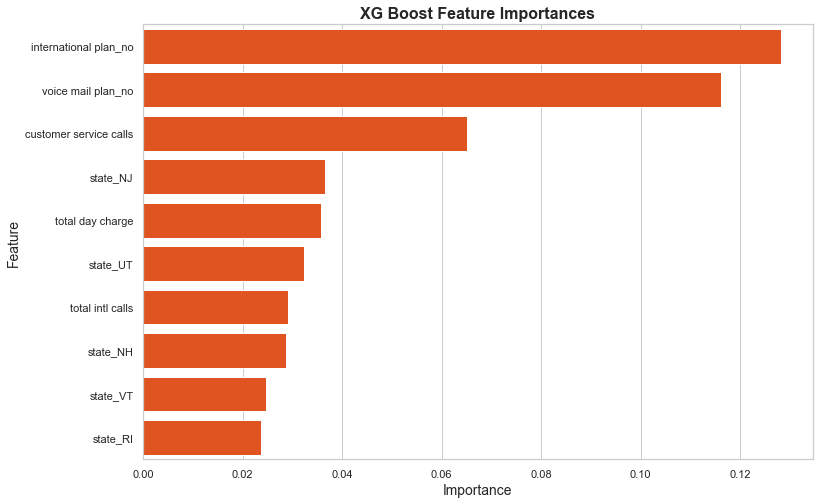

In [64]:
plot_top_feature_importances(xg, feature_names=X_train.columns, title='XG Boost Feature Importances')

## 5. Model Evaluation

### Recall Scores

In [65]:
# Set a random seed for reproducibility
np.random.seed(123)

# Define a list of classifiers to evaluate
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier()
]

# Initialize an empty DataFrame to store the results
result_table = pd.DataFrame(columns=['classifier', 'recall'])

# Train each model and calculate the recall score
for classifier in classifiers:
    model = classifier.fit(resampled_X_train, resampled_y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    result_table = result_table.append({'classifier': classifier.__class__.__name__,
                                        'recall': recall}, ignore_index=True)

# Set the classifier names as the index of the DataFrame
result_table.set_index('classifier', inplace=True)

result_table


,recall
classifier,
LogisticRegression,0.755319
RandomForestClassifier,0.670213
DecisionTreeClassifier,0.712766
XGBClassifier,0.797872


### ROC Curves

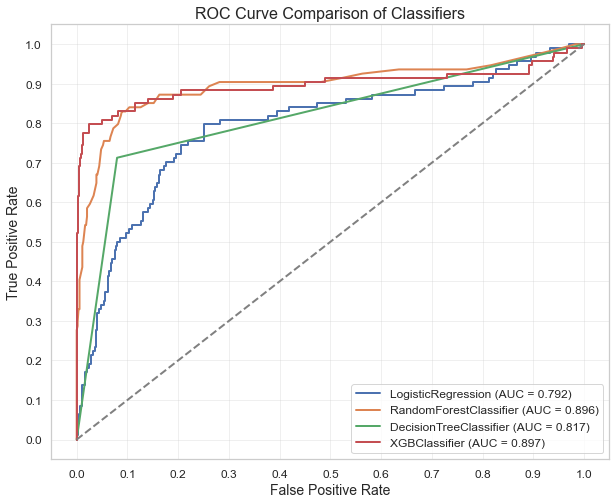

In [66]:
# Set a random seed for reproducibility
np.random.seed(123)

# Define a list of classifiers to evaluate
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier()
]

# Initialize an empty DataFrame to store the results
result_table = pd.DataFrame(columns=['classifier', 'fpr', 'tpr', 'auc'])

# Train each model and calculate the ROC curve metrics
for classifier in classifiers:
    model = classifier.fit(resampled_X_train, resampled_y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    
    result_table = result_table.append({'classifier': classifier.__class__.__name__,
                                        'fpr': fpr, 
                                        'tpr': tpr, 
                                        'auc': auc}, ignore_index=True)

# Set the classifier names as the index of the DataFrame
result_table.set_index('classifier', inplace=True)

# Create a plot for the ROC curves
plt.figure(figsize=(10, 8))

# Plot each ROC curve with enhanced aesthetics
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{} (AUC = {:.3f})".format(i, result_table.loc[i]['auc']),
             linewidth=2)

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', linewidth=2)

plt.xticks(np.arange(0.0, 1.1, step=0.1), fontsize=12)
plt.xlabel("False Positive Rate", fontsize=14)

plt.yticks(np.arange(0.0, 1.1, step=0.1), fontsize=12)
plt.ylabel("True Positive Rate", fontsize=14)

plt.title('ROC Curve Comparison of Classifiers', fontsize=16)
plt.legend(prop={'size':12}, loc='lower right')

# Add grid for better readability
plt.grid(alpha=0.3)

# Show the plot
plt.show()

## 6. Conclusion